## FIFA PROJECT

### Importing necessary Libraries

In [920]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None) #always show all the columns. Normally pandas have a max limit.
pd.set_option('display.max_rows', None) #show all the rows

## Get Data

In [921]:
fifa = pd.read_csv('./files_for_lab/csv_files/fifa21_train.csv') ##Read the file into python as a dataframe
fifa.shape

(11701, 101)

In [922]:
print(list(fifa.columns))


['ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB'

## Dropping the columns with 60% or more NaN values

In [923]:
#Dropping the columns with 60% or more NaN values
columns_raw=list(fifa.columns)

fifa.dropna(axis=1, thresh= 0.40*len(fifa), inplace=True) #Drop colums with NaNs. Threshold condition: Keep the columns having 40% or more valid data.

columns_result=list(fifa.columns)
columns_dropped=list(set(columns_raw) - set(columns_result))

print(columns_dropped)
fifa.shape

['Loan Date End']


(11701, 100)

### Droping the unwanted Columns

In [924]:
# Dropped Hits column
fifa = fifa.drop(['Hits', 'ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
fifa.shape


(11701, 10)

In [925]:
fifa.head()

,Age,BP,Height,Weight,Total Stats,Base Stats,W/F,SM,IR,OVA
0,26,CM,"5'9""",161lbs,1682,357,4 ★,2★,1 ★,64
1,30,ST,"6'0""",159lbs,1961,412,3 ★,4★,2 ★,77
2,33,CAM,"5'4""",134lbs,1925,404,4 ★,4★,2 ★,80
3,22,CDM,"5'10""",152lbs,1527,329,2 ★,2★,1 ★,59
4,23,CDM,"5'11""",150lbs,1664,360,2 ★,3★,1 ★,65


## Dealing with the data

In [926]:
cols = [] 
for i in range(len(fifa.columns)):
    cols.append(fifa.columns[i].lower().replace(' ','_')) #making all columns lowercase and #replacing the spaces with underscores
fifa.columns = cols

fifa=fifa.rename(columns={
'bp':'base_position',
'w/f':'weak_foot',
'sm':'skill_moves',
'ir':'international_reputation',
'ova':'overall_rating'
})
fifa.head()

,age,base_position,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,overall_rating
0,26,CM,"5'9""",161lbs,1682,357,4 ★,2★,1 ★,64
1,30,ST,"6'0""",159lbs,1961,412,3 ★,4★,2 ★,77
2,33,CAM,"5'4""",134lbs,1925,404,4 ★,4★,2 ★,80
3,22,CDM,"5'10""",152lbs,1527,329,2 ★,2★,1 ★,59
4,23,CDM,"5'11""",150lbs,1664,360,2 ★,3★,1 ★,65


In [927]:
fifa.dtypes 

age                          int64
base_position               object
height                      object
weight                      object
total_stats                  int64
base_stats                   int64
weak_foot                   object
skill_moves                 object
international_reputation    object
overall_rating               int64
dtype: object

In [928]:
fifa.isna().sum() 

age                         0
base_position               0
height                      0
weight                      0
total_stats                 0
base_stats                  0
weak_foot                   0
skill_moves                 0
international_reputation    0
overall_rating              0
dtype: int64

In [929]:
 fifa['base_position'].unique() 

array(['CM', 'ST', 'CAM', 'CDM', 'LM', 'RB', 'CB', 'RM', 'GK', 'LB', 'RW',
       'LWB', 'LW', 'RWB', 'CF'], dtype=object)

In [930]:
fifa['base_position']= fifa['base_position'].replace({'CM':'Midfielder', 'CAM':'Midfielder','CDM':'Midfielder', 'LM':'Midfielder',
                                                 'RM':'Midfielder', 'ST':'Striker', 'RB':'Back', 'CB':'Back', 'LB':'Back',
                                                 'LWB':'Back', 'RWB':'Back', 'LW':'Wing', 'RW':'Wing', 'CF':'Forward',
                                                  'GK':'Goalkeeper' }) #you can substitute map with replace here.
fifa.head()

,age,base_position,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,overall_rating
0,26,Midfielder,"5'9""",161lbs,1682,357,4 ★,2★,1 ★,64
1,30,Striker,"6'0""",159lbs,1961,412,3 ★,4★,2 ★,77
2,33,Midfielder,"5'4""",134lbs,1925,404,4 ★,4★,2 ★,80
3,22,Midfielder,"5'10""",152lbs,1527,329,2 ★,2★,1 ★,59
4,23,Midfielder,"5'11""",150lbs,1664,360,2 ★,3★,1 ★,65


In [931]:
def change_height_feetinch_to_cm(height):
    feet = int(height.split("'")[0]) 
    inch = int(height.split("'")[1][:-1])
    result = ((feet * 30.48) + (inch * 2.54))
    result = (round( result,0))
    return result

fifa['height'] = fifa['height'].apply(lambda x: change_height_feetinch_to_cm(x))
fifa['weight'] = fifa['weight'].map(lambda x: x.rstrip('lbs'))
fifa['weight'] = pd.to_numeric(fifa['weight'], errors='coerce')
fifa['weak_foot'] = fifa['weak_foot'].str.replace('★','')
fifa['weak_foot'] = pd.to_numeric(fifa['weak_foot'], errors='coerce')
fifa['skill_moves'] = fifa['skill_moves'].str.replace('★','')
fifa['skill_moves'] = pd.to_numeric(fifa['skill_moves'], errors='coerce')
fifa['international_reputation'] = fifa['international_reputation'].str.replace('★','')
fifa['international_reputation'] = pd.to_numeric(fifa['international_reputation'], errors='coerce')
fifa.head()

,age,base_position,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,overall_rating
0,26,Midfielder,175.0,161,1682,357,4,2,1,64
1,30,Striker,183.0,159,1961,412,3,4,2,77
2,33,Midfielder,163.0,134,1925,404,4,4,2,80
3,22,Midfielder,178.0,152,1527,329,2,2,1,59
4,23,Midfielder,180.0,150,1664,360,2,3,1,65


In [932]:
fifa.dtypes

age                           int64
base_position                object
height                      float64
weight                        int64
total_stats                   int64
base_stats                    int64
weak_foot                     int64
skill_moves                   int64
international_reputation      int64
overall_rating                int64
dtype: object

### separated the  numerical and categorical columns?

In [933]:
numerical=fifa.select_dtypes(np.number)
categoricals=fifa.select_dtypes(object)

### Distribution

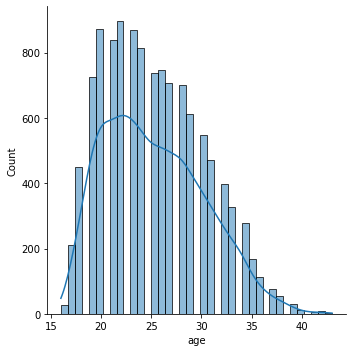

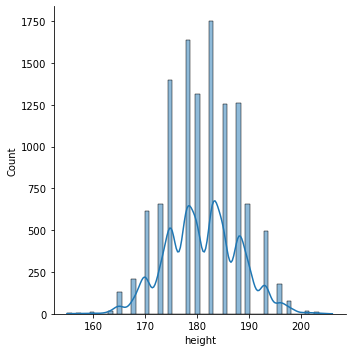

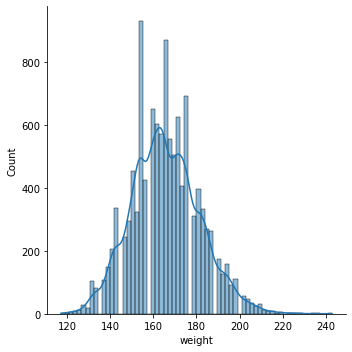

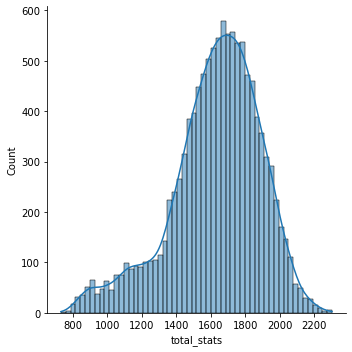

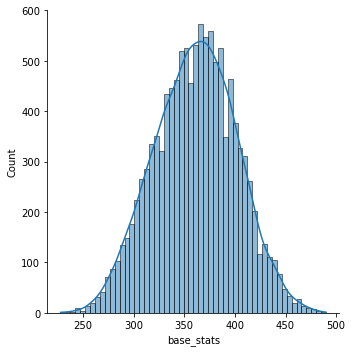

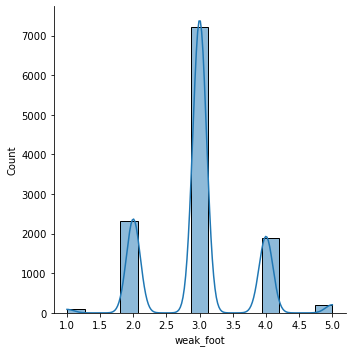

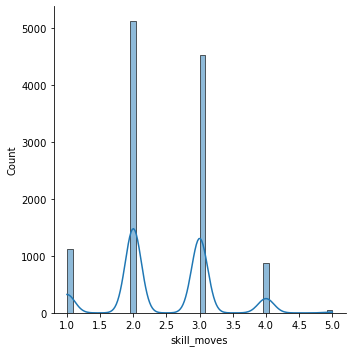

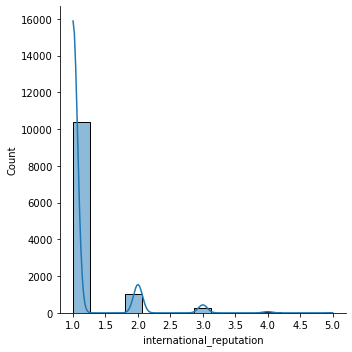

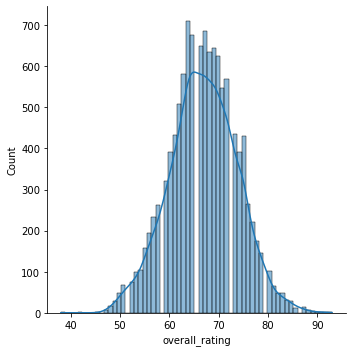

In [934]:
for column in numerical.columns:
    sns.displot(numerical[column],kde = True)
    plt.show()

### Correlation

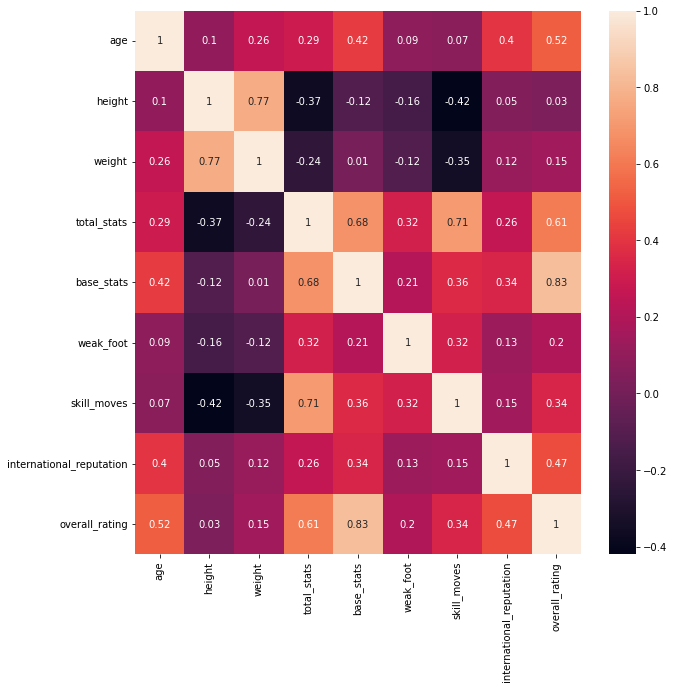

In [935]:

fig, ax = plt.subplots(figsize=(10,10))
correlations = numerical.corr()
sns.heatmap(round(correlations,2), annot=True)
plt.show()

#### Dealing with outliers

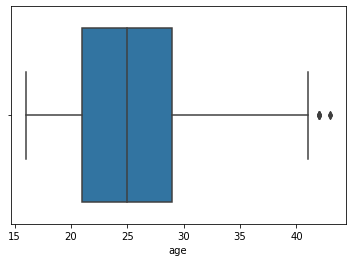

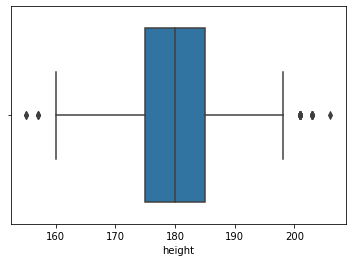

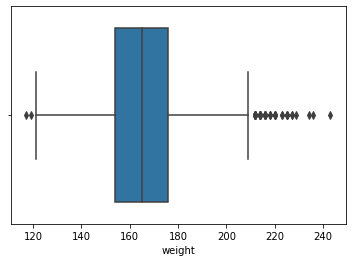

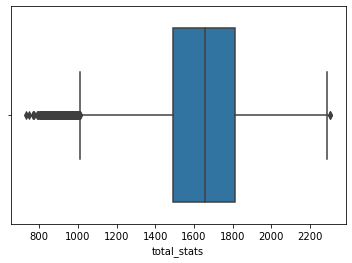

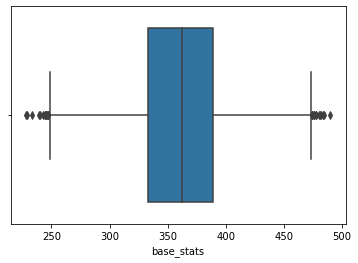

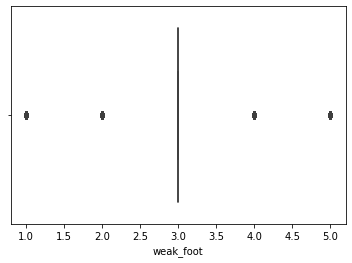

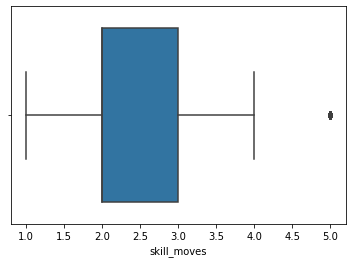

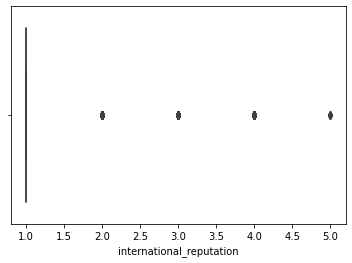

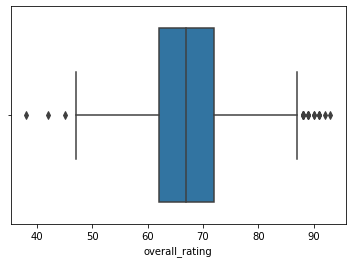

In [936]:
for column in numerical.columns:
    sns.boxplot(x = numerical[column])
    plt.show()

In [937]:

def remove_outliers(df):
    numerical = df.select_dtypes(np.number)
    for column in numerical.columns:
        iqr = numerical[column].quantile(0.75) - numerical[column].quantile(0.25)
        upper_limit = numerical[column].quantile(0.75) + 1.5 * iqr
        lower_limit = numerical[column].quantile(0.25) - 1.5 * iqr
#         print(upper_limit)
#         print(lower_limit)
        df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
#         df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df
fifa = remove_outliers(fifa)

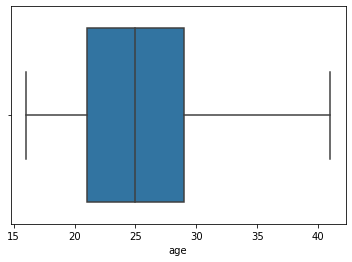

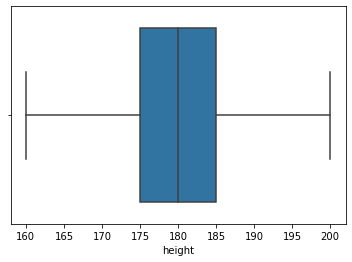

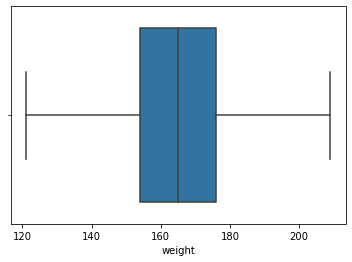

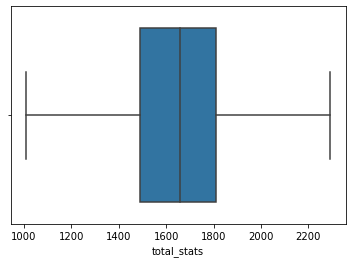

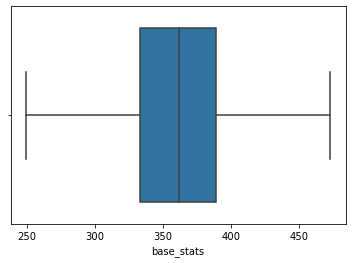

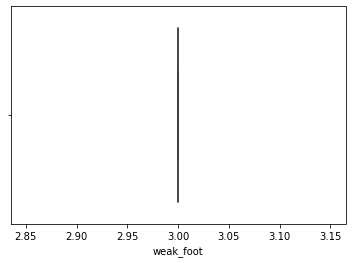

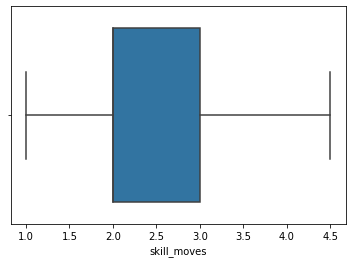

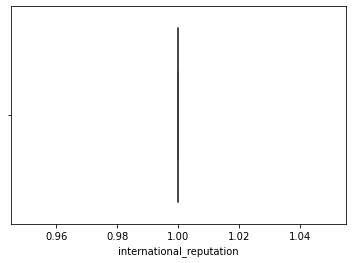

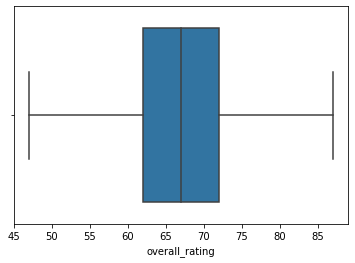

In [938]:
numerical = fifa.select_dtypes(np.number)
for column in numerical.columns:
    sns.boxplot(x = numerical[column])
    plt.show()

In [939]:
y = fifa['overall_rating'] # lowercase y: target feature 
X = fifa.drop(['overall_rating'], axis=1) # UPPERCASE X: predictors

print(y.shape, X.shape)

(11701,) (11701, 9)


In [940]:
X_num=X.select_dtypes(np.number)
X_cat=X.select_dtypes(object)
X_num.head()

,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation
0,26.0,175.0,161.0,1682.0,357.0,3.0,2.0,1.0
1,30.0,183.0,159.0,1961.0,412.0,3.0,4.0,1.0
2,33.0,163.0,134.0,1925.0,404.0,3.0,4.0,1.0
3,22.0,178.0,152.0,1527.0,329.0,3.0,2.0,1.0
4,23.0,180.0,150.0,1664.0,360.0,3.0,3.0,1.0


In [941]:
transformer = MinMaxScaler().fit(X_num)
numerical_normalized = transformer.transform(X_num)
# transformer.transform returns a numpy ndarray
print(numerical_normalized.shape)
# In the below step we convert numpy ndarray to dataframe again
numerical_normalized_df = pd.DataFrame(numerical_normalized, columns=X_num.columns)
numerical_normalized_df.head(20)

(11701, 8)


,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation
0,0.40,0.375,0.454545,0.524533,0.482143,0.0,0.285714,0.0
1,0.56,0.575,0.431818,0.741822,0.727679,0.0,0.857143,0.0
2,0.68,0.075,0.147727,0.713785,0.691964,0.0,0.857143,0.0
3,0.24,0.450,0.352273,0.403816,0.357143,0.0,0.285714,0.0
4,0.28,0.500,0.329545,0.510514,0.495536,0.0,0.571429,0.0
5,0.68,0.450,0.375000,0.622664,0.580357,0.0,0.571429,0.0
6,0.56,0.575,0.375000,0.712227,0.718750,0.0,0.571429,0.0
7,0.24,0.450,0.454545,0.400701,0.348214,0.0,0.285714,0.0
8,0.72,0.825,0.806818,0.488707,0.397321,0.0,0.285714,0.0
9,0.76,0.575,0.477273,0.623442,0.589286,0.0,0.571429,0.0


In [942]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(drop='first').fit(X_cat)
# cols=encoder.get_feature_names(input_features=X_cat.columns)
# encoded = encoder.transform(X_cat).toarray() #we want to transform the X_cut and make it an array
# onehot_encoded = pd.DataFrame(encoded,columns=cols) #make it a df
# onehot_encoded.head(20)
# #onehot_encoded.shape

In [943]:
encoder = OneHotEncoder(drop='first').fit(X_cat)

encoded_cols = encoder.get_feature_names_out(input_features=X_cat.columns)
categorical_encoded = encoder.transform(X_cat).toarray()
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoded_cols)
categorical_encoded_df.head(20)
#X_cat.head()

,base_position_Forward,base_position_Goalkeeper,base_position_Midfielder,base_position_Striker,base_position_Wing
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0


In [944]:
print(numerical_normalized_df.shape, categorical_encoded_df.shape)

(11701, 8) (11701, 5)


In [945]:
X = pd.concat([numerical_normalized_df, categorical_encoded_df], axis=1) 
X.columns
X.shape

(11701, 13)

In [946]:

### Splitting into train set and test set.


In [947]:
y.head()

0    64.0
1    77.0
2    80.0
3    59.0
4    65.0
Name: overall_rating, dtype: float64

In [948]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9360, 13)
(2341, 13)
(9360,)
(2341,)


In [949]:
X_train.head()

,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,base_position_Forward,base_position_Goalkeeper,base_position_Midfielder,base_position_Striker,base_position_Wing
1775,0.16,0.575,0.500000,0.350078,0.263393,0.0,0.285714,0.0,0.0,0.0,0.0,1.0,0.0
2455,0.48,0.625,0.625000,0.543224,0.410714,0.0,0.285714,0.0,0.0,0.0,0.0,1.0,0.0
93,0.68,0.575,0.500000,0.489486,0.388393,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0
8952,0.12,0.575,0.625000,0.349299,0.299107,0.0,0.285714,0.0,0.0,0.0,1.0,0.0,0.0
7810,0.56,0.500,0.556818,0.847741,0.857143,0.0,0.857143,0.0,0.0,0.0,0.0,1.0,0.0


In [950]:
y_train.head()

1775    62.0
2455    74.0
93      69.0
8952    55.0
7810    79.0
Name: overall_rating, dtype: float64

## Applying linear regression.

In [951]:

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

## Model Validation - Description


## R2

In [952]:

predictions_train = lm.predict(X_train)
r2_score(y_train, predictions_train)

0.7737931511992017

In [953]:

predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7864409348148245

In [954]:
## model validation

In [955]:
y_test[:10]

2405     49.0
8025     70.0
10025    62.0
10933    72.0
1402     64.0
8944     74.0
2727     69.0
1595     60.0
3247     61.0
2751     70.0
Name: overall_rating, dtype: float64

In [956]:
predictions_test[:10]

array([52.78139615, 65.62369016, 67.21590939, 70.51540286, 68.43884596,
       71.16237453, 73.59522464, 60.76875737, 64.89416723, 75.59749538])

In [957]:
display(predictions_test)
display(y_test)

array([52.78139615, 65.62369016, 67.21590939, ..., 59.24596128,
       69.08921637, 71.60014896])

2405     49.0
8025     70.0
10025    62.0
10933    72.0
1402     64.0
8944     74.0
2727     69.0
1595     60.0
3247     61.0
2751     70.0
7602     52.0
11160    87.0
700      74.0
8075     72.0
6861     68.0
3971     58.0
6726     70.0
6004     76.0
6991     75.0
11423    70.0
1730     69.0
7306     72.0
304      68.0
8455     73.0
10430    66.0
5381     60.0
4949     62.0
6221     60.0
3984     68.0
7765     69.0
3542     71.0
119      69.0
6128     65.0
245      66.0
8786     69.0
8606     61.0
1904     71.0
1720     71.0
4923     76.0
7197     69.0
7615     64.0
5211     65.0
3896     77.0
3013     75.0
2495     74.0
1068     71.0
3035     66.0
4977     71.0
101      76.0
11337    70.0
744      61.0
4489     69.0
970      66.0
9487     68.0
5480     56.0
11552    71.0
2619     79.0
9481     70.0
424      70.0
6110     66.0
5147     81.0
11074    66.0
4162     60.0
3784     80.0
10184    76.0
5042     74.0
10384    60.0
7814     57.0
11625    69.0
8024     65.0
3894     63.0
5961  

## MSE

In [958]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

10.012731162908064

## RMSE

In [959]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

3.164289993491125

## MAE

In [960]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

2.4998891413901267


## Functions

In [961]:
def lowercase_rename_column_names(df):
    print("Raw dataframe shape: ",df.shape)
    df.dropna(axis=1, thresh= 0.40*len(df), inplace=True)
    cols = [] 
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_')) #making all columns lowercase and #replacing the spaces with underscores
    df.columns = cols

    df=df.rename(columns={
    'bp':'base_position',
    'w/f':'weak_foot',
    'sm':'skill_moves',
    'ir':'international_reputation',
    'ova':'overall_rating'
    })
    return df

def rename_base_position_values(df):
    df['base_position']= df['base_position'].replace({'CM':'Midfielder', 'CAM':'Midfielder','CDM':'Midfielder', 'LM':'Midfielder',
                                                 'RM':'Midfielder', 'ST':'Striker', 'RB':'Back', 'CB':'Back', 'LB':'Back',
                                                 'LWB':'Back', 'RWB':'Back', 'LW':'Wing', 'RW':'Wing', 'CF':'Forward',
                                                  'GK':'Goalkeeper' }) #you can substitute map with replace here.
    return df

def change_height_feetinch_to_cm(height):
        feet = int(height.split("'")[0])
        inch = int(height.split("'")[1][:-1])
        result = ((feet * 30.48) + (inch * 2.54))
        result=round(result,0)
        return result
    
def format_columns(df):
    if('height' in df):
        df['height'] = df['height'].apply(lambda x: change_height_feetinch_to_cm(x))
    df['weight'] = df['weight'].map(lambda x: x.rstrip('lbs'))
    df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
    df['weak_foot'] = df['weak_foot'].str.replace('★','')
    df['weak_foot'] = pd.to_numeric(df['weak_foot'], errors='coerce')
    df['skill_moves'] = df['skill_moves'].str.replace('★','')
    df['skill_moves'] = pd.to_numeric(df['skill_moves'], errors='coerce')
    df['international_reputation'] = df['international_reputation'].str.replace('★','')
    df['international_reputation'] = pd.to_numeric(df['international_reputation'], errors='coerce')
    if('hits' in df):
        df['hits'] = pd.to_numeric(df['hits'], errors='coerce')
    df = df.dropna()
    return df

# def normalize_X(df):
#     X = df.drop(['overall_rating'], axis=1) # UPPERCASE X: predictors

#     ## Separating the numerical and categorical columns in df X    
#     X_num=X.select_dtypes(np.number)
#     X_cat=X.select_dtypes(object)
    
#     ## Normalizing X_num
#     from sklearn.preprocessing import MinMaxScaler
#     transformer = MinMaxScaler().fit(X_num)
#     X_normalized = transformer.transform(X_num) #X_normalized here is not in the form of a df.
#     X_normalized=pd.DataFrame(X_normalized, columns=X_num.columns) #making it a df
    
#     ## One-hot encoding
#     from sklearn.preprocessing import OneHotEncoder
#     encoder = OneHotEncoder(drop='first').fit(X_cat)
#     cols=encoder.get_feature_names_out(input_features=X_cat.columns)
#     encoded = encoder.transform(X_cat).toarray() #we want to transform the X_cut and make it an array
#     onehot_encoded = pd.DataFrame(encoded,columns=cols) #make it a df
    
#     ##Concatanation before model building
#     X = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed
#     return X



def get_y(df):
    y = df['overall_rating']
    return y

def separating_cat_num(df):
    X = df.drop(['overall_rating'], axis=1) # UPPERCASE X: predictors
    ## Separating the categorical columns in df X    
    X_cat=X.select_dtypes(object)
    X_num=X.select_dtypes(np.number)
    return X_cat,X_num

def remove_outliers(df):
    numerical = df.select_dtypes(np.number)
    for column in numerical.columns:
        iqr = numerical[column].quantile(0.75) - numerical[column].quantile(0.25)
        upper_limit = numerical[column].quantile(0.75) + 1.5 * iqr
        lower_limit = numerical[column].quantile(0.25) - 1.5 * iqr
#         print(upper_limit)
#         print(lower_limit)
        df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
#         df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df

    
def get_trained_min_max_scaler(df):
    X_cat,X_num = separating_cat_num(df)
    ## Normalizing X_num
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(clip = True).fit(X_num) # it storesa reference to min and max values of each column
    return scaler
    
def get_trained_OneHotEncoder(df):
    X_cat,X_num = separating_cat_num(df)
    ## One-hot encoding
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_cat) ## it stores unique values of each column m,f,u
    return encoder
    
def transform_categorical(encoder, df): 
    X_cat,X_num = separating_cat_num(df) 
    cols=encoder.get_feature_names_out(input_features=X_cat.columns)
    encoded = encoder.transform(X_cat).toarray() #we want to transform the X_cut and make it an array
    onehot_encoded = pd.DataFrame(encoded,columns=cols) #make it a df
    return onehot_encoded

def transform_numerical(transformer, df):
    X_cat,X_num = separating_cat_num(df)
    X_normalized = transformer.transform(X_num) #X_normalized here is not in the form of a df.
    X_normalized=pd.DataFrame(X_normalized, columns=X_num.columns) #
    return X_normalized

def train_and_test_model(X, y):    
    ##Linear Regression
    from sklearn import linear_model
    
    #Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    #Apply linear regression
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    
    from sklearn.metrics import r2_score
    
    predictions = lm.predict(X_train)
    r2_score(y_train, predictions)
    predictions_test = lm.predict(X_test) #the new data is going to go there all together with its X features
    r2_score(y_test, predictions_test)
    print('Actual overall rating: ')
    print(y_test[:10])
    print('')
    print('Predicted overall rating:')
    print(predictions_test[:10])
    
    #Validation
    import math
    from sklearn.metrics import mean_absolute_error, r2_score
    from sklearn.metrics import mean_squared_error
    
    mse=mean_squared_error(y_test,predictions_test)
    mae = mean_absolute_error(y_test, predictions_test)
    rmse = math.sqrt(mse)
    r2_train = r2_score(y_train, predictions)
    r2_test = r2_score(y_test, predictions_test)

    print('')
    print('Linear regression model validation metrics:')
    print('Mean squared error: ', mse)
    print('Mean absolute error:', mae)
    print('Root mean squared error:', rmse)
    print('train r2:', r2_train)
    print('test r2:', r2_test)
    return lm
   
    
def validate_model(lm, X, y):
    from sklearn.metrics import r2_score
    
    predictions = lm.predict(X)
    r2_score = r2_score(y, predictions)
    
    #Validation
    import math
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    
    mse=mean_squared_error(y,predictions)
    mae = mean_absolute_error(y, predictions)
    rmse = math.sqrt(mse)

    print('')
    print('Linear regression model validation metrics:')
    print('Mean squared error: ', mse)
    print('Mean absolute error:', mae)
    print('Root mean squared error:', rmse)
    print('r2:', r2_score)


## Traning the model

In [962]:
df = pd.read_csv('./files_for_lab/csv_files/fifa21_train.csv')
df = df.drop(['Hits', 'ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
df = lowercase_rename_column_names(df)
df = rename_base_position_values(df)
df = format_columns(df)
df = remove_outliers(df)

# X = normalize_X(df)
scaler = get_trained_min_max_scaler(df)
X_normalized = transform_numerical(scaler,df)
encoder = get_trained_OneHotEncoder(df)
onehot_encoded = transform_categorical(encoder,df)
X = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed
y = get_y(df)

lm = train_and_test_model(X, y)



Raw dataframe shape:  (11701, 10)
Actual overall rating: 
2405     49.0
8025     70.0
10025    62.0
10933    72.0
1402     64.0
8944     74.0
2727     69.0
1595     60.0
3247     61.0
2751     70.0
Name: overall_rating, dtype: float64

Predicted overall rating:
[52.78139615 65.62369016 67.21590939 70.51540286 68.43884596 71.16237453
 73.59522464 60.76875737 64.89416723 75.59749538]

Linear regression model validation metrics:
Mean squared error:  10.012731162908064
Mean absolute error: 2.4998891413901267
Root mean squared error: 3.164289993491125
train r2: 0.7737931511992017
test r2: 0.7864409348148245


## Dropped height & hits model (2nd model)

In [963]:
df = pd.read_csv('./files_for_lab/csv_files/fifa21_train.csv')
df = df.drop(['Height','Hits','ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
df = lowercase_rename_column_names(df)
df = rename_base_position_values(df)
df = format_columns(df)
df = remove_outliers(df)

print(df.shape)
#X = normalize_X(df)
scaler = get_trained_min_max_scaler(df)
X_normalized = transform_numerical(scaler,df)
encoder = get_trained_OneHotEncoder(df)
onehot_encoded = transform_categorical(encoder,df)
X = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed
y = get_y(df)

lm = train_and_test_model(X, y)

Raw dataframe shape:  (11701, 9)
(11701, 9)
Actual overall rating: 
2405     49.0
8025     70.0
10025    62.0
10933    72.0
1402     64.0
8944     74.0
2727     69.0
1595     60.0
3247     61.0
2751     70.0
Name: overall_rating, dtype: float64

Predicted overall rating:
[53.16135305 65.77410936 67.29980716 70.46603763 68.10752865 71.20262478
 73.26868078 60.6953795  64.90704148 75.91357642]

Linear regression model validation metrics:
Mean squared error:  10.094624422297173
Mean absolute error: 2.5129463173043822
Root mean squared error: 3.1772038685449777
train r2: 0.7714446554643029
test r2: 0.7846942537509313


## Without dropping height & hits (3rd model)

In [964]:
df = pd.read_csv('./files_for_lab/csv_files/fifa21_train.csv')
df = df.drop(['ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
df = lowercase_rename_column_names(df)
df = rename_base_position_values(df)
df = format_columns(df)
df = remove_outliers(df)

print(df.shape)
#X = normalize_X(df)
scaler = get_trained_min_max_scaler(df)
X_normalized = transform_numerical(scaler, df)
encoder = get_trained_OneHotEncoder(df)
onehot_encoded = transform_categorical(encoder, df)
X = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed
y = get_y(df)

print(X.shape)
print(y.shape)
lm = train_and_test_model(X, y)

Raw dataframe shape:  (11701, 11)
(11659, 11)
(11659, 14)
(11659,)
Actual overall rating: 
3873    70.0
5705    74.0
8864    75.0
9178    78.0
6415    65.0
8494    56.0
9591    69.0
8719    71.0
4491    72.0
5040    69.0
Name: overall_rating, dtype: float64

Predicted overall rating:
[65.69314333 74.66624994 73.17969675 69.93888654 68.71962087 56.77144057
 69.06460011 72.21850225 67.38109688 67.40831734]

Linear regression model validation metrics:
Mean squared error:  8.478630144470351
Mean absolute error: 2.308570858507529
Root mean squared error: 2.911808741052604
train r2: 0.8145694778034285
test r2: 0.8159970634883592


## validating the new dataset with already trained model

In [965]:
#New dataset to validate

vdf = pd.read_csv('./files_for_lab/fifa21_validate.csv') # Replace this path with new dataset
vdf = vdf.drop(['ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
vdf = lowercase_rename_column_names(vdf)
vdf = rename_base_position_values(vdf)
vdf = format_columns(vdf)
vdf = remove_outliers(vdf)

#vX = normalize_X(vdf)

X_normalized = transform_numerical(scaler,vdf)

onehot_encoded = transform_categorical(encoder,vdf)
vX = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed

vy = get_y(vdf)
print(vX.shape)
print(vy.shape)

# #lm - Already trained model
# vX - X from new dataset
# vy - y from new dataset
#Note: There is no need to split the new dataset for training and testing the model, as the model is already trained
validate_model(lm, vX, vy)

Raw dataframe shape:  (1999, 11)
(1990, 14)
(1990,)

Linear regression model validation metrics:
Mean squared error:  8.606577513109373
Mean absolute error: 2.3254163205457066
Root mean squared error: 2.933696902051978
r2: 0.8078799503098943
